In [1]:
from Clases.Codigo import *

In [ ]:
u,v = (4.43,0.0),(0.0,3.27)
p1,p2,p3 = (0,0),(0,1),(0.3,0.5)
p4,p5,p6 = (0.8,0),(0.8,1),(0.5,0.5)
ats = [Atomo(p1,sig='P'),Atomo(p2,sig='P'),Atomo(p3,sig='P'),Atomo(p4,sig='P',posZ=0.3),Atomo(p5,sig='P',posZ=0.3),Atomo(p6,sig='P',posZ=0.3)]
phM = Malla(u,v,atms=ats,name='Phosporene',enls=[])
phMr= phM.mRot(68.23)

In [2]:
def buscaOptimos(m1, m2, err=0.01, prof=20):
    (u1,u2), (v1,v2) = m1.u, m1.v
    (p1,p2), (q1,q2) = m2.u, m2.v
    optms = []
    for a in range(prof):
        for i in range(prof):
            b=i
            if (a,b)!=(0,0):
                eq0 = (p2*q1)-(p1*q2)
                eq1 = (a*((q1*u2)-(q2*u1)))+(b*((q1*v2)-(q2*v1)))
                eq2 = (a*((q1*u1)-(q2*u2)))+(b*((q1*v1)+(q2*v2)))
                eq3 = (a*((p1*u2)-(p2*u1)))+(b*((p1*v2)-(p2*v1)))
                eq4 = (a*((p1*u1)-(p2*u2)))+(b*((p1*v1)+(p2*v2)))
                nm = [[a,b],[0,0],0,0.1]
                for t in range(-17900,-9100):
                    th = math.radians(t/100)
                    se = math.sin(th)
                    co = math.cos(th)
                    rc = ((co*eq1)-(se*eq2))/eq0
                    rd = ((se*eq4)-(co*eq3))/eq0
                    c, d = round(rc), round(rd)
                    ru,rv = rota(m2.u,t/100), rota(m2.v,t/100)
                    pos1 = m2V(m1.u, m1.v,(a,b))
                    pos2 = m2V(ru, rv,(c,d))
                    erp = dist(pos1,pos2)
                    if erp<nm[3]:
                        nm=[[a,i],[c,d],t/100,erp]
                for t in range(-8900,-100):
                    th = math.radians(t/100)
                    se = math.sin(th)
                    co = math.cos(th)
                    rc = ((co*eq1)-(se*eq2))/eq0
                    rd = ((se*eq4)-(co*eq3))/eq0
                    c, d = round(rc), round(rd)
                    ru,rv = rota(m2.u,t/100), rota(m2.v,t/100)
                    pos1 = m2V(m1.u, m1.v,(a,b))
                    pos2 = m2V(ru, rv,(c,d))
                    erp = dist(pos1,pos2)
                    if erp<nm[3]:
                        nm=[[a,i],[c,d],t/100,erp]
                for t in range(100,8900):
                    th = math.radians(t/100)
                    se = math.sin(th)
                    co = math.cos(th)
                    rc = ((co*eq1)-(se*eq2))/eq0
                    rd = ((se*eq4)-(co*eq3))/eq0
                    c, d = round(rc), round(rd)
                    ru,rv = rota(m2.u,t/100), rota(m2.v,t/100)
                    pos1 = m2V(m1.u, m1.v,(a,b))
                    pos2 = m2V(ru, rv,(c,d))
                    erp = dist(pos1,pos2)
                    if erp<nm[3]:
                        nm=[[a,i],[c,d],t/100,erp]
                        
                for t in range(9100,17900):
                    th = math.radians(t/100)
                    se = math.sin(th)
                    co = math.cos(th)
                    rc = ((co*eq1)-(se*eq2))/eq0
                    rd = ((se*eq4)-(co*eq3))/eq0
                    c, d = round(rc), round(rd)
                    ru,rv = rota(m2.u,t/100), rota(m2.v,t/100)
                    pos1 = m2V(m1.u, m1.v,(a,b))
                    pos2 = m2V(ru, rv,(c,d))
                    erp = dist(pos1,pos2)
                    if erp<nm[3]:
                        nm=[[a,i],[c,d],t/100,erp]
                        
                if nm[3]<err:
                    optms.append(nm)
    return optms


In [ ]:
datos=buscaOptimos(phM,phM)

In [ ]:
datos

In [ ]:
phMr.showNM(9,9)

In [ ]:
datF1=[]
for d in datos:
    ds=d[0]
    if abs(ds[0]-ds[1])==1:
        datF1.append(d)
dG=[]
for d in datos:
    dG.append([(d[0][0]**2+d[0][1]**2+(d[0][1]*d[0][0])),d[2]])
dG=np.array(dG)

In [ ]:
xs,ys=dG[:,1],dG[:,0]
fig, ax = plt.subplots()
ax.scatter(xs,ys)

In [ ]:
orden = np.sort(dG,  axis=1)

In [ ]:
xs,ys=orden[:,0],orden[:,1]
fig, ax = plt.subplots()
ax.scatter(xs,ys,s=0.1)

In [3]:
u,v = (4.5,0.0),(0.0,4.5)
p1,p2,p3 = (0,0),(0,1),(0.3,0.5)
p4,p5,p6 = (0.8,0),(0.8,1),(0.5,0.5)
ats = [Atomo(p1,sig='P'),Atomo(p2,sig='P'),Atomo(p3,sig='P'),Atomo(p4,sig='P',posZ=0.3),Atomo(p5,sig='P',posZ=0.3),Atomo(p6,sig='P',posZ=0.3)]
phMc = Malla(u,v,atms=ats,name='Phosporene',enls=[])

In [ ]:
datos2=buscaOptimos(phMc,phMc)

In [ ]:
dG2=[]
for d in datos2:
    dG2.append([(d[0][0]**2+d[0][1]**2),d[2]])
dG2=np.array(dG2)

In [ ]:
xs,ys=dG2[:,1],dG2[:,0]
fig, ax = plt.subplots()
ax.scatter(xs,ys)

In [ ]:
datF1=[]
for d in datos2:
    ds=d[0]
    if abs(ds[0]-ds[1])==1:
        datF1.append(d)
dG2=[]
for d in datF1:
    dG2.append([(d[0][0]**2+d[0][1]**2),d[2]])
dG2=np.array(dG2)
xs,ys=dG2[:,1],dG2[:,0]
fig, ax = plt.subplots()
ax.scatter(xs,ys)

In [ ]:
datF1

In [4]:
phMcr=phMc.mRot(126.87)

In [5]:
su,sv=m2V(phMc.u,phMc.v,(1,2)),m2V(phMc.u,phMc.v,(-2,1))
sCell=superMesh(su,sv,[phMc,phMcr])

Agregado atomo P(-0.0, 1.0)
Agregado atomo P(0.16, 0.6799999999999999)
Agregado atomo P(-0.0, 1.0)
Agregado atomo P(0.26, 0.98)
Agregado atomo P(0.16, 0.6799999999999999)
Agregado atomo P(0.56, 0.8799999999999999)
Agregado atomo P(0.3, 0.9)
Agregado atomo P(0.56, 0.8799999999999999)
Agregado atomo P(0.2, 0.6)
Agregado atomo P(0.06000000000000001, 0.37999999999999995)
Agregado atomo P(0.36000000000000004, 0.27999999999999997)
Agregado atomo P(0.1, 0.3)
Agregado atomo P(0.2, 0.6)
Agregado atomo P(0.6, 0.8)
Agregado atomo P(0.46, 0.58)
Agregado atomo P(0.36000000000000004, 0.27999999999999997)
Agregado atomo P(0.76, 0.4799999999999999)
Agregado atomo P(0.5, 0.5)
Agregado atomo P(0.6, 0.8)
Agregado atomo P(1.0, 1.0)
Agregado atomo P(0.86, 0.7799999999999999)
Agregado atomo P(0.76, 0.4799999999999999)
Agregado atomo P(0.9, 0.7)
Agregado atomo P(1.0, 1.0)
Agregado atomo P(0.0, -0.0)
Agregado atomo P(0.0, -0.0)
Agregado atomo P(0.4, 0.2)
Agregado atomo P(0.4, 0.2)
Agregado atomo P(0.8, 0.4)
A

In [6]:
m2V(phMcr.u,phMcr.v,(1,-2))

(4.499983922239597, 9.000008038862251)

In [7]:
print(sCell)

Malla(Angulo Interno = 90.000°)
1.0
        10.0623058987         0.0000000000         0.0000000000
        -0.0000000000         10.0623058987         0.0000000000
        0.0000000000         0.0000000000         10.0000000000
	P
	68
Direct
     0.0000000000         1.0000000000         0.0000000000
     0.1600000000         0.6800000000         0.1500000000
     0.0000000000         1.0000000000         0.0000000000
     0.2600000000         0.9800000000         0.0000000000
     0.1600000000         0.6800000000         0.1500000000
     0.5600000000         0.8800000000         0.1500000000
     0.3000000000         0.9000000000         0.1500000000
     0.5600000000         0.8800000000         0.1500000000
     0.2000000000         0.6000000000         0.0000000000
     0.0600000000         0.3800000000         0.0000000000
     0.3600000000         0.2800000000         0.1500000000
     0.1000000000         0.3000000000         0.1500000000
     0.2000000000         0.600000000

In [10]:
sCell.exporta()

1

In [53]:
ve1=m2V(u,v,(2,3))
ve2=m2V(u,v,(3,2))
cAng(ve1,ve2)

13.173551107258973

In [29]:
ru,rv=rota(u,36.86989),rota(v,36.86989)
m2V(u,v,(1,2))

(4.5, 9.0)

In [30]:
m2V(ru,rv,(2,1))

(4.500001201006332, 8.999999399496733)

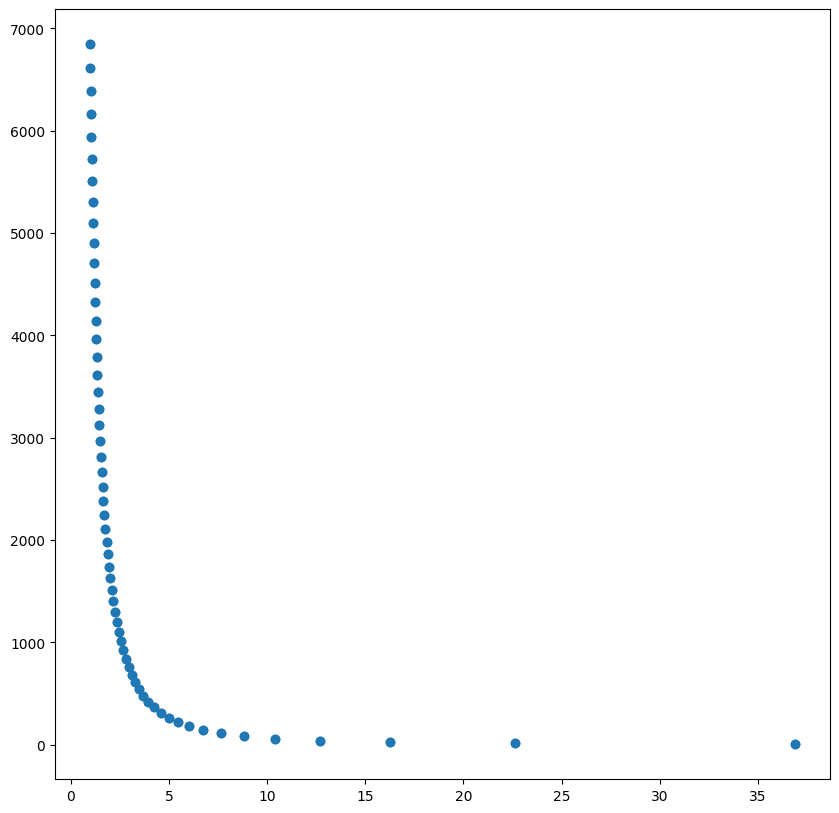

In [66]:
datos=[]
p=2
#u,v=(p,0.0),(p/2,math.sqrt(3)*(-p/2))
u,v=(p,0),(0,p)
for a in range(1,60):
    for b in range(1,60):
        if a!=b:
            (u1,u2)=m2V(u,v,(a,b))
            (v1,v2)=m2V(u,v,(b,a))
            x=((u1*v1)+(u2*v2))/(dist((0,0),(u1,u2))*dist((0,0),(v1,v2)))
            th=math.degrees(math.acos((x)))
            numc=(a**2+b**2)
            if abs(a-b)==1:
                datos.append([a,b,numc,th])
datos=np.array(datos)
xs,ys=datos[:,3],datos[:,2]
fig, ax = plt.subplots()
ax.scatter(xs,ys)

In [67]:
datos

array([[1.00000000e+00, 2.00000000e+00, 5.00000000e+00, 3.68698976e+01],
       [2.00000000e+00, 1.00000000e+00, 5.00000000e+00, 3.68698976e+01],
       [2.00000000e+00, 3.00000000e+00, 1.30000000e+01, 2.26198649e+01],
       [3.00000000e+00, 2.00000000e+00, 1.30000000e+01, 2.26198649e+01],
       [3.00000000e+00, 4.00000000e+00, 2.50000000e+01, 1.62602047e+01],
       [4.00000000e+00, 3.00000000e+00, 2.50000000e+01, 1.62602047e+01],
       [4.00000000e+00, 5.00000000e+00, 4.10000000e+01, 1.26803835e+01],
       [5.00000000e+00, 4.00000000e+00, 4.10000000e+01, 1.26803835e+01],
       [5.00000000e+00, 6.00000000e+00, 6.10000000e+01, 1.03888578e+01],
       [6.00000000e+00, 5.00000000e+00, 6.10000000e+01, 1.03888578e+01],
       [6.00000000e+00, 7.00000000e+00, 8.50000000e+01, 8.79741071e+00],
       [7.00000000e+00, 6.00000000e+00, 8.50000000e+01, 8.79741071e+00],
       [7.00000000e+00, 8.00000000e+00, 1.13000000e+02, 7.62814967e+00],
       [8.00000000e+00, 7.00000000e+00, 1.13000000e

In [81]:
def busca(vectU,vectV,factor,rango,eps):
    res = []
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    for i in range(60*factor):
        th = (i+(0*factor))/factor
        ang = math.radians(th)
        cos = math.cos(ang)
        sen = math.sin(ang)
        ru, rv = rota(vectU,th), rota(vectV,th)
        for a in range(rango):
            for b in range(rango):
                if (th%60!=0):
                    if (a!=0)and(b!=0):
                        c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                        d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                        r1 = sumaV(multV(a,vectU),multV(b,vectV))
                        r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                        #(e1,e2) = sumaV(r1,multV(-1,r2))
                        #err = max(abs(e1),abs(e2))
                        err = dist(r1,r2)
                        if err<eps:
                            res.append([a,b,round(c),round(d),round(th%60,3),err])
                            print("(a,b)=",(a,b)," (c,d)=",((c),(d)),"Theta=",round(th%60,3),"err:",err)
    return res

In [198]:
def buscaMN(vectU,vectV, th, rang=15, eps=0.01, show=True):
    epsm = eps
    f1, f2 = 0, 0
    res = []
    rmin = [0,0,0,0,0.0,0.0,(0.0,0.0)]
    rmin2 = [0,0,0,0,0.0,0.0,(0.0,0.0)]
    ang = math.radians(th)
    cos = math.cos(ang)
    sen = math.sin(ang)
    ru, rv = rota(vectU,th), rota(vectV,th)
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    delta=0.0
    print("Busqueda en a pos")
    for a in range(rang):
        for i in range(rang):
            b=-i
            if (a!=0)and(b!=0):
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                err = dist(r1,r2)
                delta=dist((0,0),r1)/dist((0,0),r2)
                if err<eps:
                    if (round(c)!=0)and(round(d)!=0):
                        (f1,f2) = (c/round(c)),(d/round(d))
                    res.append([a,b,round(c),round(d),th,err,(f1,f2)])
                    if err<epsm:
                        print("nuevo mejor=",(a,b),(c,d),"Delta=",delta)
                        epsm = err
                        rmin = [a,b,round(c),round(d),th,err,(f1,f2)]
                    if show:
                        print("(n,m)=",(a,b)," (c,d)=",(round(c),round(d)),"Theta=",th,"err:",err)
    print("Busqueda en a neg")
    epsm = eps
    for i in range(rang):
        a = i*(-1)
        for b in range(rang):
            if (a!=0)and(b!=0):
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                err = dist(r1,r2)
                if err<eps:
                    if (round(c)!=0)and(round(d)!=0):
                        (f1,f2) = (c/round(c)),(d/round(d))
                    res.append([a,b,round(c),round(d),th,err,(f1,f2)])
                    if err<epsm:
                        print("nuevo mejor=",(a,b),(c,d))
                        epsm = err
                        rmin2 = [a,b,round(c),round(d),th,err,(f1,f2)]
                    if show:
                        print("(n,m)=",(a,b)," (c,d)=",(round(c),round(d)),"Theta=",th,"err:",err)
    return res, rmin, rmin2

In [200]:
mh=hexa6(2.44)

In [201]:
u,v=mh.u, mh.v
r,rm,rm2=buscaMN(u,v, 30,eps=0.5)
rm

Busqueda en a pos
nuevo mejor= (1, -3) (-1.154700538379251, -4.04145188432738) Delta= 1.0000000000000002
(n,m)= (1, -3)  (c,d)= (-1, -4) Theta= 30 err: 0.3384297281105511
(n,m)= (1, -10)  (c,d)= (-5, -12) Theta= 30 err: 0.4194205900493902
(n,m)= (3, -1)  (c,d)= (1, -3) Theta= 30 err: 0.3384297281105536
(n,m)= (3, -3)  (c,d)= (0, -5) Theta= 30 err: 0.4786119114041837
nuevo mejor= (3, -8) (-2.8867513459481273, -10.969655114602888) Delta= 1.0000000000000002
(n,m)= (3, -8)  (c,d)= (-3, -11) Theta= 30 err: 0.2477477557686508
nuevo mejor= (4, -4) (1.3322676295501878e-15, -6.928203230275509) Delta= 0.9897433186107871
(n,m)= (4, -4)  (c,d)= (0, -7) Theta= 30 err: 0.17518411812775472
nuevo mejor= (4, -11) (-4.041451884327378, -15.011106998930268) Delta= 1.0
(n,m)= (4, -11)  (c,d)= (-4, -15) Theta= 30 err: 0.09068197234189967
(n,m)= (5, -7)  (c,d)= (-1, -11) Theta= 30 err: 0.4194205900493882
(n,m)= (5, -14)  (c,d)= (-5, -19) Theta= 30 err: 0.42911170045245267
(n,m)= (7, -5)  (c,d)= (1, -10) Thet

[4,
 -11,
 -4,
 -15,
 30,
 0.09068197234189967,
 (1.0103629710818445, 1.0007404665953512)]

In [205]:
#(3, 4)(4.04145188432738, 2.886751345948129)
#(4, -4) (1.3322676295501878e-15, -6.928203230275509) Delta= 0.9897433186107871
delta= 0.9897433186107871
mhop=hexa6(2.44*delta)
mr=mhop.mRot(30)
su=m2V(mh.u,mh.v.(4,-4))
sv=m2V(mh.u,mh.v.(4,8))

Agregado atomo C(0.9174477301124532, 0.042152436484798196)
Agregado atomo C(0.6791238888558339, 0.006304801570774231)
Agregado atomo C(0.7705143809127151, 0.05200004759921477)
Agregado atomo C(0.5321905396560958, 0.01615241268519081)
Agregado atomo C(0.6235810317129769, 0.06184765871363135)
Agregado atomo C(0.38525719045635753, 0.026000023799607384)
Agregado atomo C(0.4766476825132386, 0.07169526982804793)
Agregado atomo C(0.23832384125661935, 0.035847634914023964)
Agregado atomo C(0.3297143333135004, 0.0815428809424645)
Agregado atomo C(0.0913904920568811, 0.045695246028440537)
Agregado atomo C(0.1827809841137622, 0.09139049205688107)
Agregado atomo C(0.03584763491402399, 0.10123810317129767)
Agregado atomo C(0.9532953650264772, 0.14339053965609586)
Agregado atomo C(0.8063620158267389, 0.15323815077051242)
Agregado atomo C(0.8977525078836203, 0.198933396798953)
Agregado atomo C(0.6594286666270008, 0.163085761884929)
Agregado atomo C(0.7508191586838819, 0.20878100791336957)
Agregado at

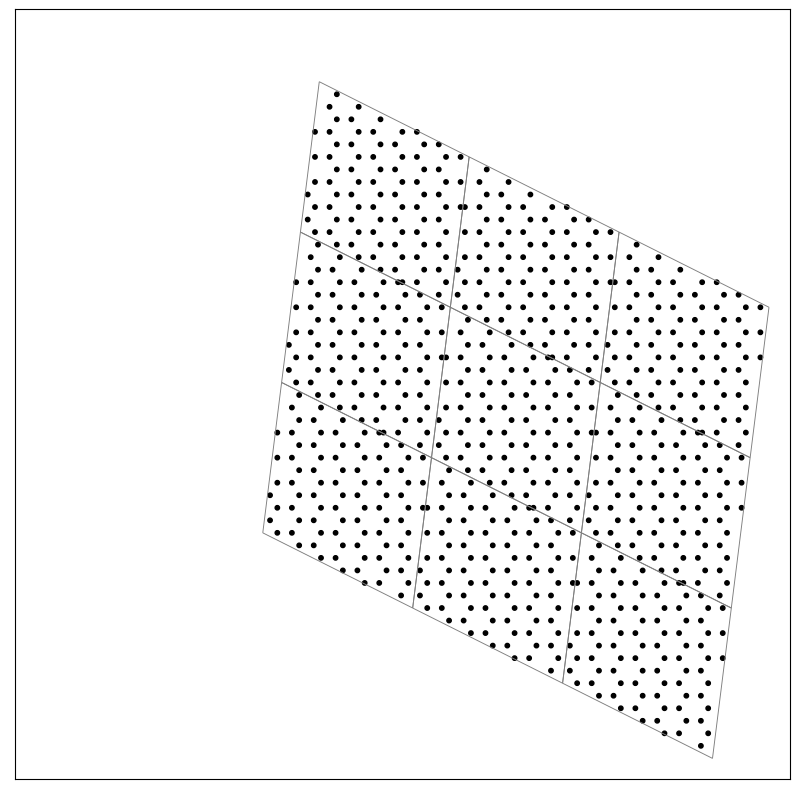

1

In [208]:
sCell=superMesh(su,sv,[mr])
sCell.showNM(3,3)

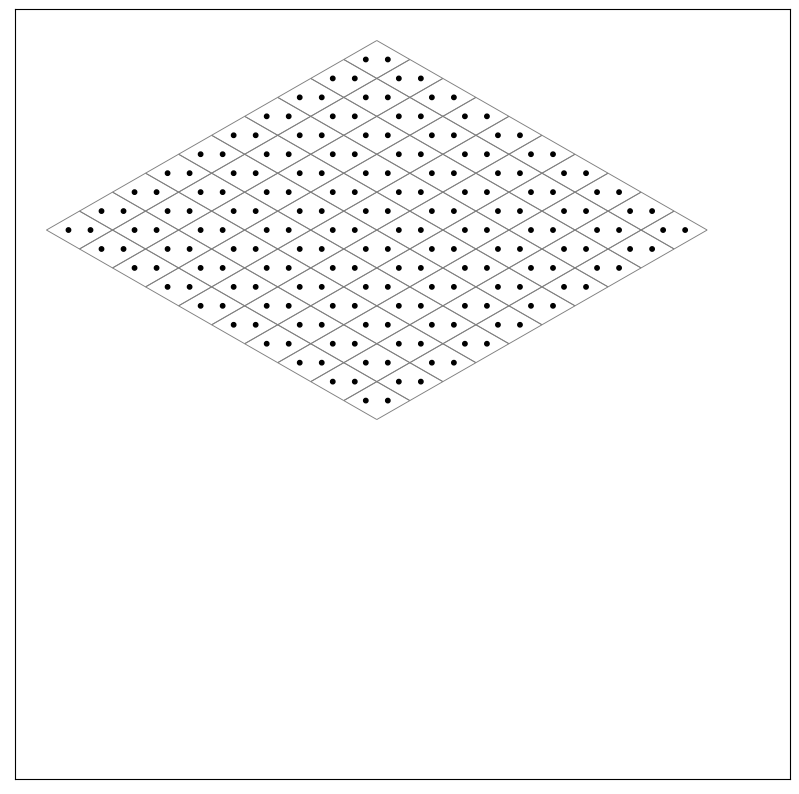

1

In [210]:
mr.showNM(10,10)